In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 

In order to graphically plot the multiple dimensions vectors from the embeddings, t-SNE has been used. 

### t-SNE
t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line. 

In [2]:
def plot_tsne(embeddings, sentences, words_to_check):
    tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='random', learning_rate=200.0)
    embeddings_2d = tsne.fit_transform(embeddings)
    fig, ax = plt.subplots(figsize=(8, 8))

    word_colors = {word: f'C{i}' for i, word in enumerate(words_to_check)}

    for i, sentence in enumerate(sentences):
        sentence_id = sentence.get('id', '')
        sentence = sentence.get('name', '')

        for word in words_to_check:
            if word in sentence.lower():
                color = word_colors[word]
                break

        ax.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=color, s=10)
        ax.annotate(f'{sentence_id}', (embeddings_2d[i, 0], embeddings_2d[i, 1]), color=color)


    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=word)
                      for word, color in word_colors.items()]
    ax.legend(handles=legend_handles, title='Legend')

    plt.title('Research Infrastructures')
    plt.show()

    return embeddings_2d

In [3]:
embeddings_file = 'embeddings/embeddings.npy'
sentences_file = 'embeddings/sentences.npy'

The following `words_to_check` variable is for classifying the elements in different categories by their appearance in the sentence. These words are an example from a specific use case and might be changed.

In [4]:
words_to_check = ['aalto', 'polito', 'tuda','upc','kth','ulisboa','grenoble','']

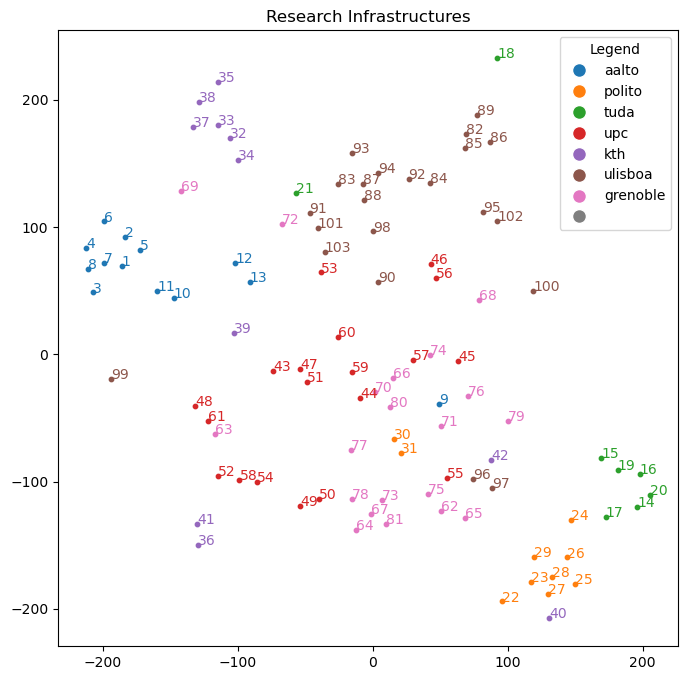

In [5]:
if os.path.exists(embeddings_file) and os.path.exists(sentences_file):
    embeddings = np.load(embeddings_file)
    with open(sentences_file, 'rb') as f:
        sentences = pickle.load(f)
    plot_tsne(embeddings, sentences, words_to_check)
else:
    print("The embeddings have not been generated, execute the embeddings_generator notebook.")